In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np
import glob

import pandas as pd

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# colors1 = ['#073B4C', '#FFD166', '#EF476F', '#06D6A0',  '#118AB2', '#4D4C7D', '#FFDAC0', '#F54952']
colors = ['#073B4C', '#FFD166', '#EF476F', '#06D6A0',  '#118AB2', '#4D4C7D', '#FFDAC0', '#F54952']
colors2 = ['#dd3497', '#ae017e', '#7a0177', '#49006a'] # red-purple
warm_colors= ['#C2E4FF', '#2a2a72', '#009ffd', '#ffa400']
cold_colors = ['#DBDFFD', '#9BA3EB', '#646FD4', '#242F9B']

In [3]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

In [4]:
df = pd.read_csv('sample_efficiency.csv')
keys = df.keys()
df.head()

,num_train_samples,addition,reverse,algorithmic reasoning,simplified scratchpad,random A,random C,random A & C
0,250,0.000000,0.000000,59.50000,0.40000,NaN,NaN,NaN
1,500,0.000000,0.000000,92.80000,0.10000,NaN,NaN,NaN
2,1000,0.393939,1.565657,99.79798,84.64646,10.40404,11.31313,0.606061
3,2000,1.737374,30.646460,99.59596,99.69697,97.27273,98.58586,78.888890
4,3000,28.747470,79.141410,100.00000,99.79798,98.28283,99.29293,90.202020


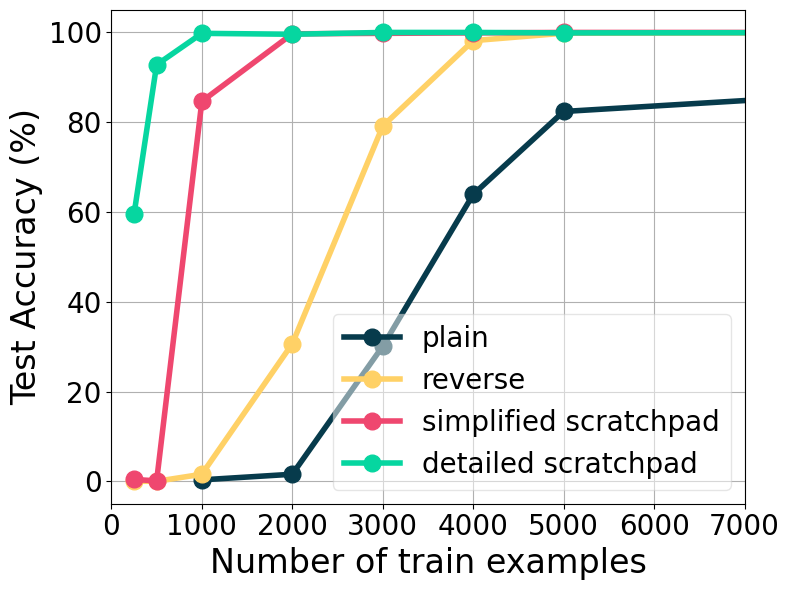

In [5]:
model='nanogpt'
name='sample_efficiency'

labels = ['plain', 'reverse', 'simplified scratchpad', 'algorithmic reasoning']
names = ['addition', 'reverse', 'simplified scratchpad', 'detailed scratchpad']

plt.figure(figsize=(8,6))
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

file = 'sample_efficiency.csv'
df = pd.read_csv('sample_efficiency.csv')
keys = df.keys()
num_ar = df['num_train_samples'].unique()


for i, label in enumerate(labels):
    if i ==0:
        df = pd.read_csv('../out/out-addition-bal/eval_add-bal_Zeroshot/result.csv')
        plt.plot(df['num_train_samples'], df['test_accuracy'], label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    else:
        df = pd.read_csv(f'{file}')
        df_mean = df.groupby('num_train_samples').mean()
        df_min = df.groupby('num_train_samples').min()
        df_max = df.groupby('num_train_samples').max()

        plt.plot(df_mean.index, df_mean[f'{label}'], label=names[i], color=colors[i], marker='o', linewidth=4, markersize=12)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0, 7000)
# plt.ylim(0, 100)
plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

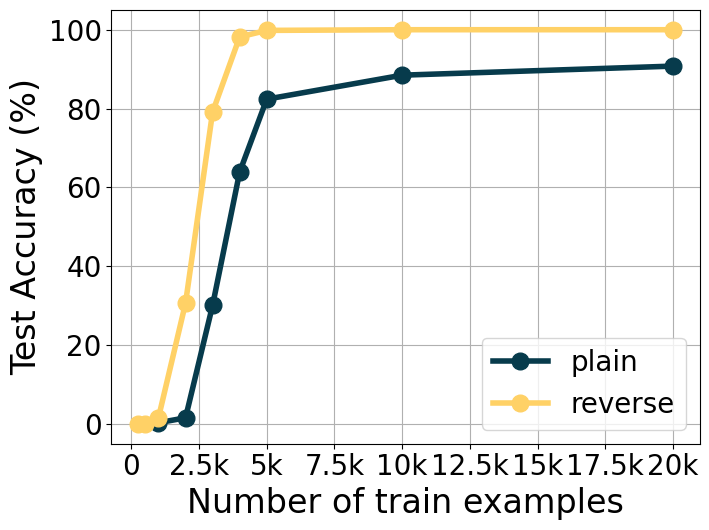

In [13]:
model='nanogpt'
name='sample_efficiency_plain_reverse'

labels = ['plain', 'reverse']
names = ['addition', 'reverse']

plt.figure(figsize=(7.2,5.4))
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

file = 'sample_efficiency.csv'
df = pd.read_csv('sample_efficiency.csv')
keys = df.keys()
num_ar = df['num_train_samples'].unique()


for i, label in enumerate(labels):
    if i ==0:
        df = pd.read_csv('../out/out-addition-bal/eval_add-bal_Zeroshot/result.csv')
        plt.plot(df['num_train_samples'][:-1], df['test_accuracy'][:-1], label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    else:
        df = pd.read_csv(f'{file}')
        df_mean = df.groupby('num_train_samples').mean()
        df_min = df.groupby('num_train_samples').min()
        df_max = df.groupby('num_train_samples').max()

        plt.plot(df_mean.index, df_mean[f'{label}'], label=names[i], color=colors[i], marker='o', linewidth=4, markersize=12)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(0, 7000)
# plt.ylim(0, 100)
plt.xlabel('Number of train examples',fontsize=24)
plt.xticks([0,2500,5000,7500,10000,12500,15000,17500,20000], 
           ["0","2.5k","5k","7.5k","10k","12.5k","15k","17.5k","20k"], fontsize=20)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

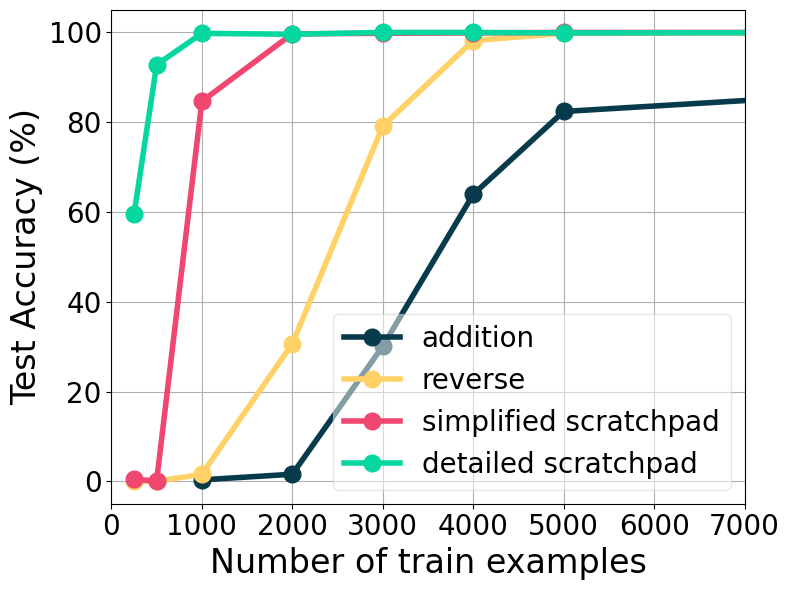

In [45]:
model='nanogpt'
name='sample_efficiency'

labels = ['addition', 'reverse', 'simplified scratchpad', 'algorithmic reasoning']
names = ['addition', 'reverse', 'simplified scratchpad', 'detailed scratchpad']

plt.figure(figsize=(8,6))
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

file = 'sample_efficiency.csv'
df = pd.read_csv('sample_efficiency.csv')
keys = df.keys()
num_ar = df['num_train_samples'].unique()


for i, label in enumerate(labels):
    if i ==0:
        df = pd.read_csv('../out/out-addition-bal/eval_add-bal_Zeroshot/result.csv')
        plt.plot(df['num_train_samples'], df['test_accuracy'], label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    else:
        df = pd.read_csv(f'{file}')
        df_mean = df.groupby('num_train_samples').mean()
        df_min = df.groupby('num_train_samples').min()
        df_max = df.groupby('num_train_samples').max()

        plt.plot(df_mean.index, df_mean[f'{label}'], label=names[i], color=colors[i], marker='o', linewidth=4, markersize=12)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0, 7000)
# plt.ylim(0, 100)
plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

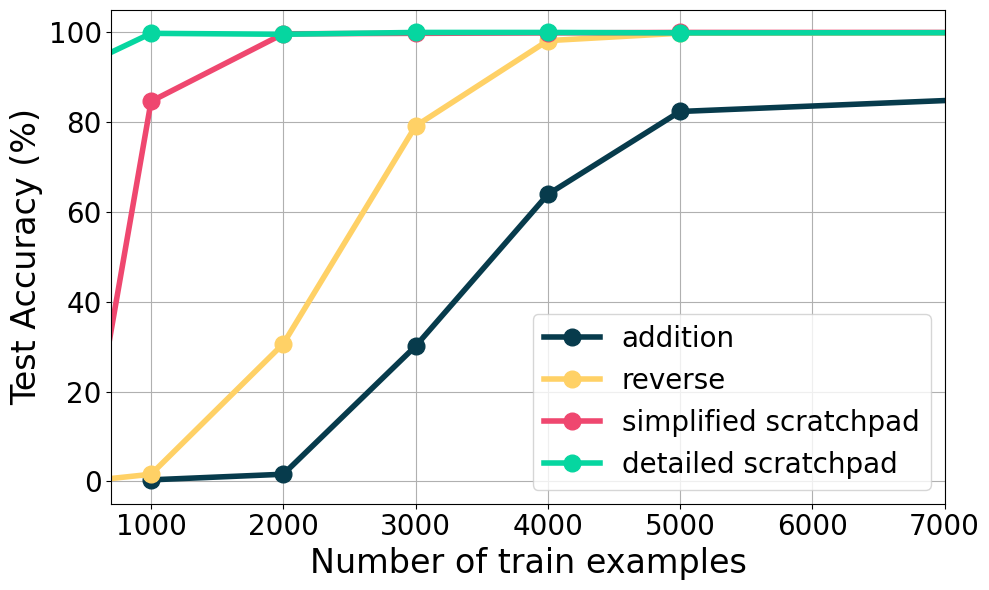

In [19]:
model='nanogpt'
name='sample_efficiency'

labels = ['addition', 'reverse', 'simplified scratchpad', 'algorithmic reasoning']
names = ['addition', 'reverse', 'simplified scratchpad', 'detailed scratchpad']

plt.figure(figsize=(10,6))
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

file = 'sample_efficiency.csv'
df = pd.read_csv('sample_efficiency.csv')
keys = df.keys()
num_ar = df['num_train_samples'].unique()


for i, label in enumerate(labels):
    if i ==0:
        df = pd.read_csv('../out/out-addition-bal/eval_add-bal_Zeroshot/result.csv')
        plt.plot(df['num_train_samples'], df['test_accuracy'], label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    else:
        df = pd.read_csv(f'{file}')
        df_mean = df.groupby('num_train_samples').mean()
        df_min = df.groupby('num_train_samples').min()
        df_max = df.groupby('num_train_samples').max()

        plt.plot(df_mean.index, df_mean[f'{label}'], label=names[i], color=colors[i], marker='o', linewidth=4, markersize=12)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(700, 7000)
# plt.ylim(0, 100)
plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20)
plt.grid(True)
plt.tight_layout()

# plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

In [20]:
file = 'sample_efficiency.csv'
df = pd.read_csv(file)
df.head()

,num_train_samples,addition,reverse,algorithmic reasoning,simplified scratchpad,random A,random C,random A & C
0,250,0.000000,0.000000,59.50000,0.40000,NaN,NaN,NaN
1,500,0.000000,0.000000,92.80000,0.10000,NaN,NaN,NaN
2,1000,0.393939,1.565657,99.79798,84.64646,10.40404,11.31313,0.606061
3,2000,1.737374,30.646460,99.59596,99.69697,97.27273,98.58586,78.888890
4,3000,28.747470,79.141410,100.00000,99.79798,98.28283,99.29293,90.202020


[  250   500  1000  2000  3000  4000  5000 10000 20000]


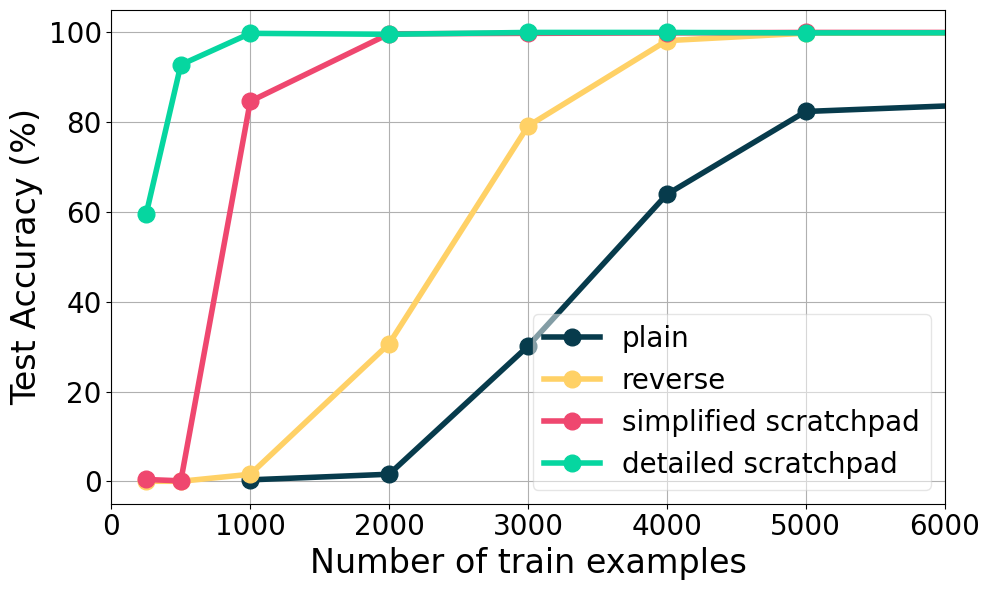

In [43]:
model='nanogpt'
name='sample_efficiency'

labels = ['plain', 'reverse', 'simplified scratchpad', 'algorithmic reasoning']
names = ['addition', 'reverse', 'simplified scratchpad', 'detailed scratchpad']

plt.figure(figsize=(10,6))
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

file = 'sample_efficiency.csv'
df = pd.read_csv(file)
keys = df.keys()
num_ar = df['num_train_samples'].unique()
print(num_ar)


for i, label in enumerate(labels):
    if i == 0:
        df = pd.read_csv('../out/out-addition-bal/eval_add-bal_Zeroshot/result.csv')
        plt.plot(df['num_train_samples'], df['test_accuracy'], label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    else:
        df = pd.read_csv(f'{file}')
        df_mean = df.groupby('num_train_samples').mean()
        df_min = df.groupby('num_train_samples').min()
        df_max = df.groupby('num_train_samples').max()

        plt.plot(df_mean.index, df_mean[f'{label}'], label=names[i], color=colors[i], marker='o', linewidth=4, markersize=12)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0, 6000)
# plt.ylim(0, 100)
plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

# plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['eval correct A & C - test_accuracy', 'eval random A - test_accuracy', 'eval random C - test_accuracy', 'eval random A & C - test_accuracy']


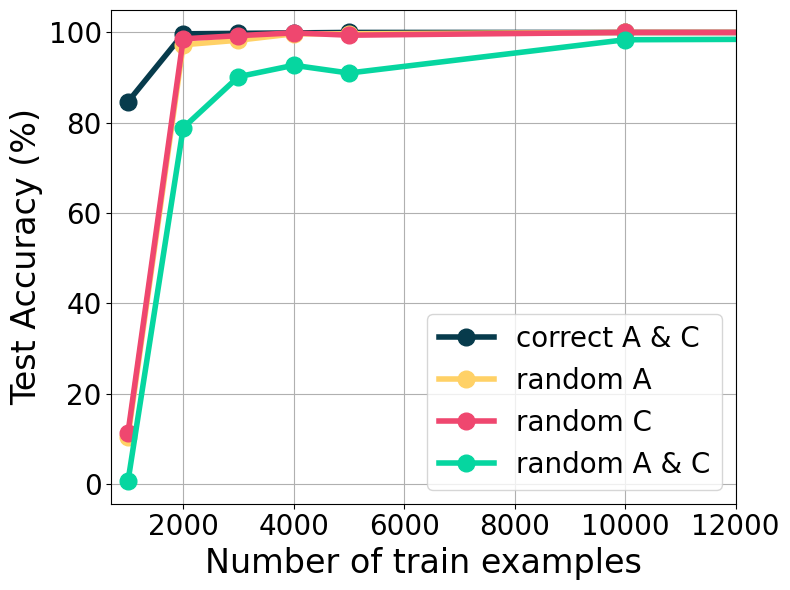

In [37]:
model='nanogpt'
name='simplified_scratchpad'

# labels = ['Correct A & C', 'Random A', 'Random C', 'Random A & C']
names = ["correct A & C", "random A", "random C", "random A & C"]
labels = [f'eval {name} - test_accuracy' for name in names]
print(labels)

plt.figure(figsize=(8,6))
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

file = 'simplified_scratchpad.csv'
df = pd.read_csv(file)
keys = df.keys()
# num_ar = df['num_train_samples'].unique()


df = pd.read_csv(f'{file}')
df_mean = df.groupby('num_train_samples').mean()
df_min = df.groupby('num_train_samples').min()
df_max = df.groupby('num_train_samples').max()

for i, label in enumerate(labels):
    plt.plot(df['num_train_samples'], df[f'{label}'], label=names[i], color=colors[i], marker='o', linewidth=4, markersize=12)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(700, 12000)
# plt.ylim(0, 100)
plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

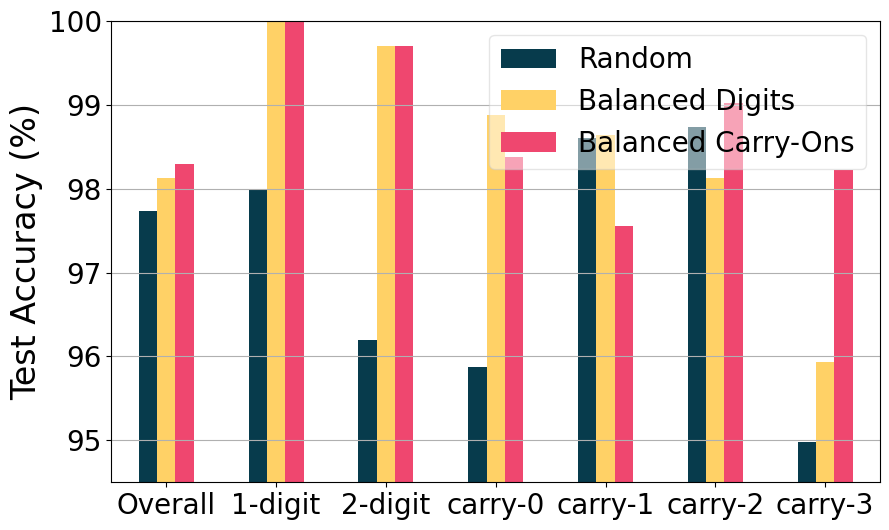

In [6]:
import pandas as pd

# colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

plotdata = pd.DataFrame({

    "Random":[97.73577277,98,96.2,95.87757651,98.60716316,98.73526876,94.98069498],

    "Balanced Digits":[98.13008947,100,99.7,98.87440758,98.63713799,98.12555787,95.93023256],

    "Balanced Carry-Ons":[98.29172142,100,99.7,98.37601499,97.55542922,99.02270767,98.22393822]},

    index=["Overall", "1-digit", "2-digit", "carry-0", "carry-1", "carry-2", "carry-3"])

plotdata.plot(kind="bar",figsize=(9, 5.4), color=colors)

plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)

# plt.title("Addition accuracy with different data sampling", fontsize=20)
plt.ylim(94.5, 100)
# plt.xlabel('Addition Accuracy',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='upper right', fontsize=20, framealpha=0.5)
plt.grid(axis=  'y')
plt.tight_layout()

plt.savefig(f'figs/data_sampling.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

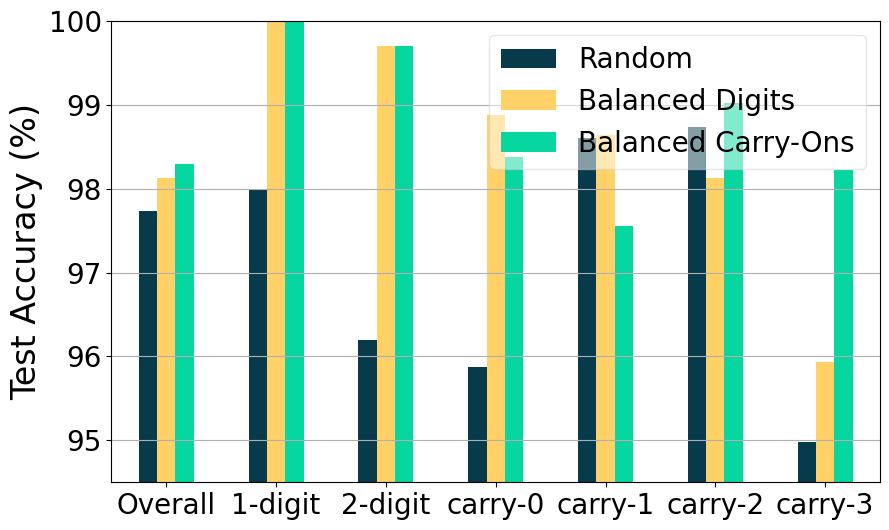

In [9]:
import pandas as pd

colors3=['#073B4C', '#FFD166', '#06D6A0', '#d62728', '#9467bd', '#8c564b', '#e377c2']

plotdata = pd.DataFrame({

    "Random":[97.73577277,98,96.2,95.87757651,98.60716316,98.73526876,94.98069498],

    "Balanced Digits":[98.13008947,100,99.7,98.87440758,98.63713799,98.12555787,95.93023256],

    "Balanced Carry-Ons":[98.29172142,100,99.7,98.37601499,97.55542922,99.02270767,98.22393822]},

    index=["Overall", "1-digit", "2-digit", "carry-0", "carry-1", "carry-2", "carry-3"])

plotdata.plot(kind="bar",figsize=(9, 5.4), color=colors3)

plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)

# plt.title("Addition accuracy with different data sampling", fontsize=20)
plt.ylim(94.5, 100)
# plt.xlabel('Addition Accuracy',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='upper right', fontsize=20, framealpha=0.5)
plt.grid(axis=  'y')
plt.tight_layout()

plt.savefig(f'figs/data_sampling.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

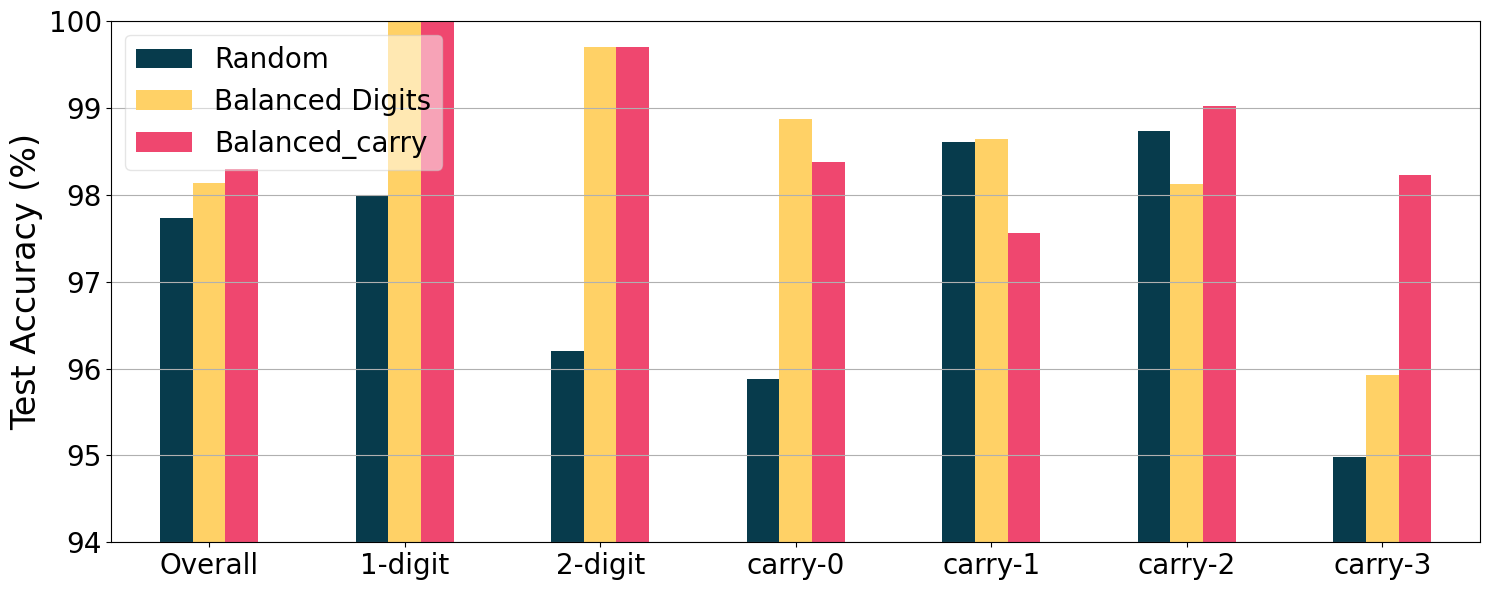

In [54]:
import pandas as pd

# colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

plotdata = pd.DataFrame({

    "Random":[97.73577277,98,96.2,95.87757651,98.60716316,98.73526876,94.98069498],

    "Balanced Digits":[98.13008947,100,99.7,98.87440758,98.63713799,98.12555787,95.93023256],

    "Balanced_carry":[98.29172142,100,99.7,98.37601499,97.55542922,99.02270767,98.22393822]},

    index=["Overall", "1-digit", "2-digit", "carry-0", "carry-1", "carry-2", "carry-3"])

plotdata.plot(kind="bar",figsize=(15, 6), color=colors)

plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)

# plt.title("Addition accuracy with different data sampling", fontsize=20)
plt.ylim(94, 100)
# plt.xlabel('Addition Accuracy',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='upper left', fontsize=20, framealpha=0.5)
plt.grid(axis=  'y')
plt.tight_layout()

plt.savefig(f'figs/data_sampling.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

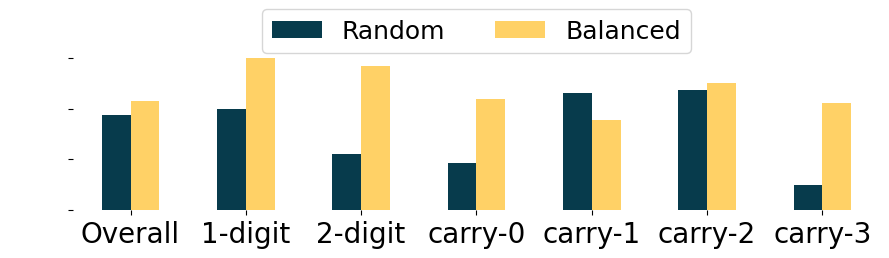

In [25]:
import pandas as pd

# colors=['#1f77b4', '#d62728', '#9467bd', '#8c564b', '#e377c2']

plotdata = pd.DataFrame({

    "Random":[97.73577277,98,96.2,95.87757651,98.60716316,98.73526876,94.98069498],

    # "Balanced Digits":[98.13008947,100,99.7,98.87440758,98.63713799,98.12555787,95.93023256],

    "Balanced":[98.29172142,100,99.7,98.37601499,97.55542922,99.02270767,98.22393822]},

    index=["Overall", "1-digit", "2-digit", "carry-0", "carry-1", "carry-2", "carry-3"])

plotdata.plot(kind="bar",figsize=(9, 3), color=colors)

plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, color='white')
# plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# plt.title("Addition accuracy with different data sampling", fontsize=20)
plt.ylim(94, 100)
# plt.xlabel('Addition Accuracy',fontsize=24)
# plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='upper center', fontsize=18, ncol=2, bbox_to_anchor=(0.5, 1.4))
# plt.grid(axis=  'y')
plt.box(False)

plt.tight_layout()

# plt.savefig(f'figs/data_sampling.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

In [26]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

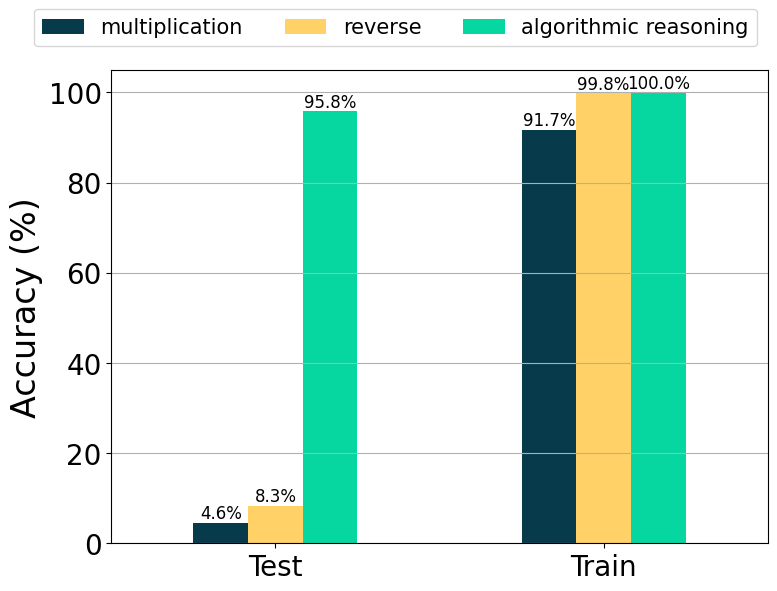

In [48]:
import pandas as pd

colors1=['#073B4C', '#FFD166', '#06D6A0', ]

plotdata = pd.DataFrame({

    "multiplication":[4.5793252946755185,91.73333333333333],

    "reverse":[8.3322043083593,99.8],

    "algorithmic reasoning":[95.8, 100]},

    index=["Test", "Train",])

ax = plotdata.plot(kind="bar",figsize=(8, 6), color=colors1)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=12)

plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)

# plt.title("Addition accuracy with different data sampling", fontsize=20)
# plt.ylim(94, 100)
# plt.xlabel('Addition Accuracy',fontsize=24)
plt.ylabel('Accuracy (%)',fontsize=24)
plt.legend(fontsize=15, bbox_to_anchor=(1, 1.15), ncol=3)
plt.grid(axis=  'y')
plt.tight_layout()

plt.savefig(f'figs/multiplication.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

# Unique Tokens

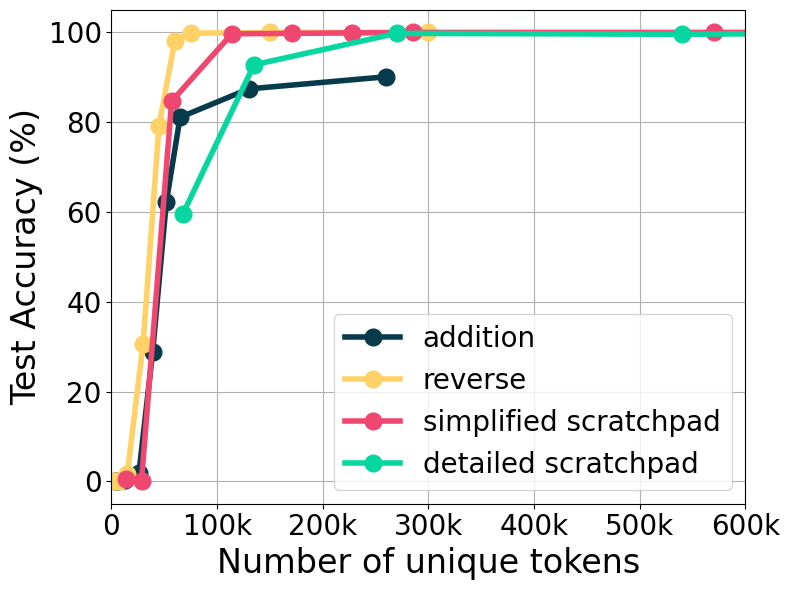

In [49]:
model='nanogpt'
name='sample_efficiency_num_tokens'

labels = ['addition', 'reverse', 'simplified scratchpad', 'algorithmic reasoning']
names = ['addition', 'reverse', 'simplified scratchpad', 'detailed scratchpad']

token_nums = [13, 15, 57, 270]

plt.figure(figsize=(8,6))
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

file = 'sample_efficiency.csv'
df = pd.read_csv('sample_efficiency.csv')
keys = df.keys()
num_ar = df['num_train_samples'].unique()


for i, label in enumerate(labels):
    df = pd.read_csv(f'{file}')
    df_mean = df.groupby('num_train_samples').mean()
    df_min = df.groupby('num_train_samples').min()
    df_max = df.groupby('num_train_samples').max()

    plt.plot(df_mean.index*token_nums[i], df_mean[f'{label}'], label=names[i], color=colors[i], marker='o', linewidth=4, markersize=12)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(10000, 600000)
plt.xticks([0,100000,200000, 300000, 400000, 500000, 600000],
           ["0", "100k", "200k", "300k", "400k", "500k", "600k"], fontsize=20)
# plt.ylim(0, 100)
plt.xlabel('Number of unique tokens',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

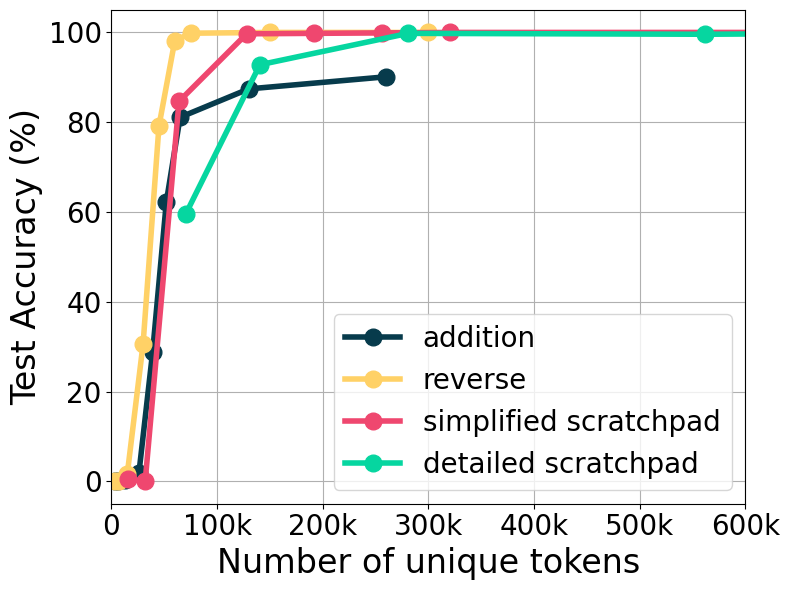

In [5]:
model='nanogpt'
name='sample_efficiency_num_tokens'

labels = ['addition', 'reverse', 'simplified scratchpad', 'algorithmic reasoning']
names = ['addition', 'reverse', 'simplified scratchpad', 'detailed scratchpad']

token_nums = [13, 15, 64, 281]

plt.figure(figsize=(8,6))
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

file = 'sample_efficiency.csv'
df = pd.read_csv('sample_efficiency.csv')
keys = df.keys()
num_ar = df['num_train_samples'].unique()


for i, label in enumerate(labels):
    df = pd.read_csv(f'{file}')
    df_mean = df.groupby('num_train_samples').mean()
    df_min = df.groupby('num_train_samples').min()
    df_max = df.groupby('num_train_samples').max()

    plt.plot(df_mean.index*token_nums[i], df_mean[f'{label}'], label=names[i], color=colors[i], marker='o', linewidth=4, markersize=12)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(10000, 600000)
plt.xticks([0,100000,200000, 300000, 400000, 500000, 600000],
           ["0", "100k", "200k", "300k", "400k", "500k", "600k"], fontsize=20)
# plt.ylim(0, 100)
plt.xlabel('Number of unique tokens',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20)
plt.grid(True)
plt.tight_layout()

# plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

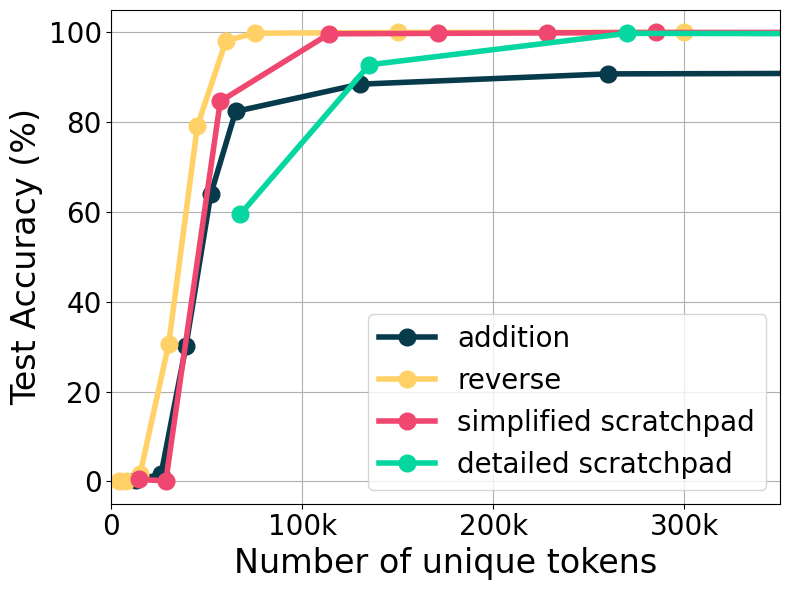

In [50]:
model='nanogpt'
name='sample_efficiency_num_tokens'

labels = ['addition', 'reverse', 'simplified scratchpad', 'algorithmic reasoning']
names = ['addition', 'reverse', 'simplified scratchpad', 'detailed scratchpad']
token_nums = [13, 15, 57, 270]

plt.figure(figsize=(8,6))
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

file = 'sample_efficiency.csv'
df = pd.read_csv('sample_efficiency.csv')
keys = df.keys()
num_ar = df['num_train_samples'].unique()

for i, label in enumerate(labels):
    if i ==0:
        df = pd.read_csv('../out/out-addition-bal/eval_add-bal_Zeroshot/result.csv')
        plt.plot(df['num_train_samples']*token_nums[i], df['test_accuracy'], label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    else:
        df = pd.read_csv(f'{file}')
        df_mean = df.groupby('num_train_samples').mean()
        df_min = df.groupby('num_train_samples').min()
        df_max = df.groupby('num_train_samples').max()

        plt.plot(df_mean.index*token_nums[i], df_mean[f'{label}'], label=names[i], color=colors[i], marker='o', linewidth=4, markersize=12)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(10000, 350000)
plt.xticks([0,100000,200000, 300000],# 400000, 500000, 600000],
           ["0", "100k", "200k", "300k"], fontsize=20)#, "400k"#, "500k", "600k"], fontsize=20)
# plt.ylim(0, 100)
plt.xlabel('Number of unique tokens',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

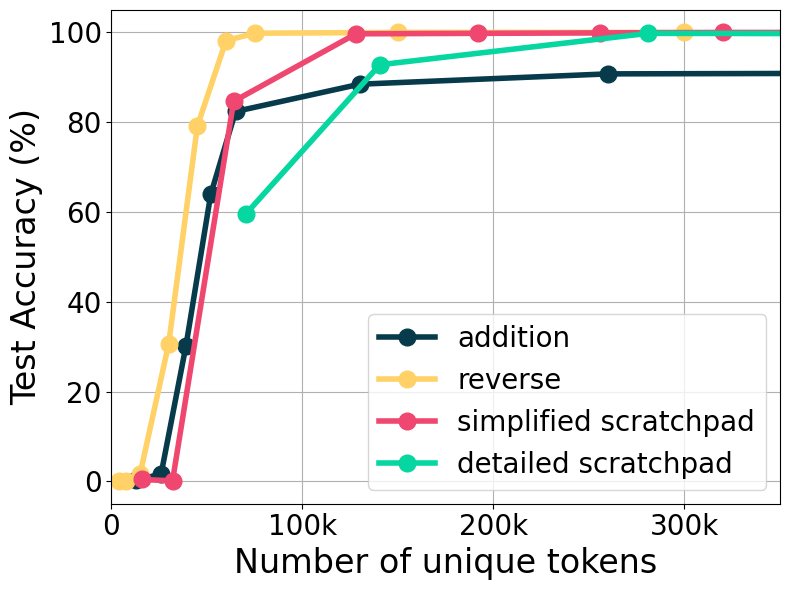

In [6]:
model='nanogpt'
name='sample_efficiency_num_tokens'

labels = ['addition', 'reverse', 'simplified scratchpad', 'algorithmic reasoning']
names = ['addition', 'reverse', 'simplified scratchpad', 'detailed scratchpad']
token_nums = [13, 15, 64, 281]

plt.figure(figsize=(8,6))
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

file = 'sample_efficiency.csv'
df = pd.read_csv('sample_efficiency.csv')
keys = df.keys()
num_ar = df['num_train_samples'].unique()

for i, label in enumerate(labels):
    if i ==0:
        df = pd.read_csv('../out/out-addition-bal/eval_add-bal_Zeroshot/result.csv')
        plt.plot(df['num_train_samples']*token_nums[i], df['test_accuracy'], label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    else:
        df = pd.read_csv(f'{file}')
        df_mean = df.groupby('num_train_samples').mean()
        df_min = df.groupby('num_train_samples').min()
        df_max = df.groupby('num_train_samples').max()

        plt.plot(df_mean.index*token_nums[i], df_mean[f'{label}'], label=names[i], color=colors[i], marker='o', linewidth=4, markersize=12)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(10000, 350000)
plt.xticks([0,100000,200000, 300000],# 400000, 500000, 600000],
           ["0", "100k", "200k", "300k"], fontsize=20)#, "400k"#, "500k", "600k"], fontsize=20)
# plt.ylim(0, 100)
plt.xlabel('Number of unique tokens',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['Plain, Overall Acc', 'Reverse, Overall Acc', 'Plain, Excluded Acc', 'Reverse, Excluded Acc']


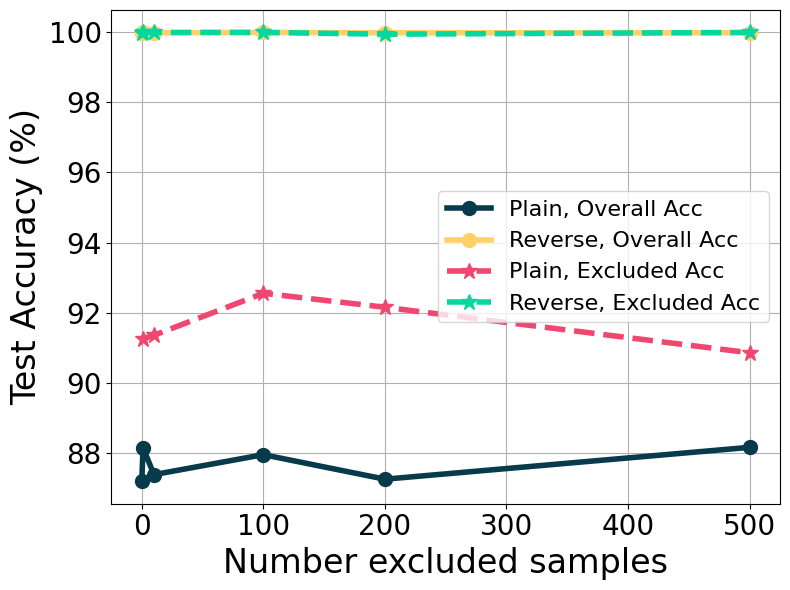

In [30]:
model='nanogpt'
name='excluding_numbers'

labels = ['Plain, Overall Acc', 'Reverse, Overall Acc', 'Plain, Excluded Acc', 'Reverse, Excluded Acc']

print(labels)

plt.figure(figsize=(8,6))
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plain_all = '87.18%	90.60%	91.05%	92.20%	92.15%	91.50% '.replace('%','').split('%\t')[:-1]
# Reverse_all = '99.97%	100.00%	99.95%	100.00%	99.95%	100.00%'.replace('%','').split('%\t')[:-1]
# Plain_excluded = '88.14%	91.25%  91.35%  92.55%  92.15%  90.85%'.replace('%','').split('%\t')[:-1]
# Reverse_excluded = '100.00%	100.00% 100.00% 100.00% 99.95% 100.00%'.replace('%','').split('%\t')[:-1]
num_excluded = [0,1,10,100,200,500]
overall_acc = '87.18%,99.97%,88.14%,100.00%,87.37%,99.99%,87.94%,100.00%,87.24%,99.99%,88.15%,99.99%'.replace('%','').split(',')
plain_acc = overall_acc[::2]
reverse_acc = overall_acc[1::2]

Plain_excluded = '87.18%,91.25%,91.35%,92.55%,92.15%,90.85%'.replace('%','').split(',')
Reverse_excluded = '99.97%,100.00,100.00%,100.00%,99.95%,100.00%'.replace('%','').split(',')
plain_acc = np.array(plain_acc).astype(float)
reverse_acc = np.array(reverse_acc).astype(float)
Plain_excluded = np.array(Plain_excluded).astype(float)
Reverse_excluded = np.array(Reverse_excluded).astype(float)

names=['aa','bb']
# for i, label in enumerate(labels):
i=0
plt.plot(num_excluded, plain_acc, label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=10)
i+=1
plt.plot(num_excluded, reverse_acc, label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=10)
i+=1
plt.plot(num_excluded[1:], Plain_excluded[1:], label=labels[i], color=colors[i], marker='*', linewidth=4, markersize=12, linestyle='--')
i+=1
plt.plot(num_excluded, Reverse_excluded, label=labels[i], color=colors[i], marker='*', linewidth=4, markersize=12, linestyle='--')

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim(0, 100)
plt.xlabel('Number excluded samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='center right', fontsize=16)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['1 digit', '2 digit', '3 digit', '4 digit']


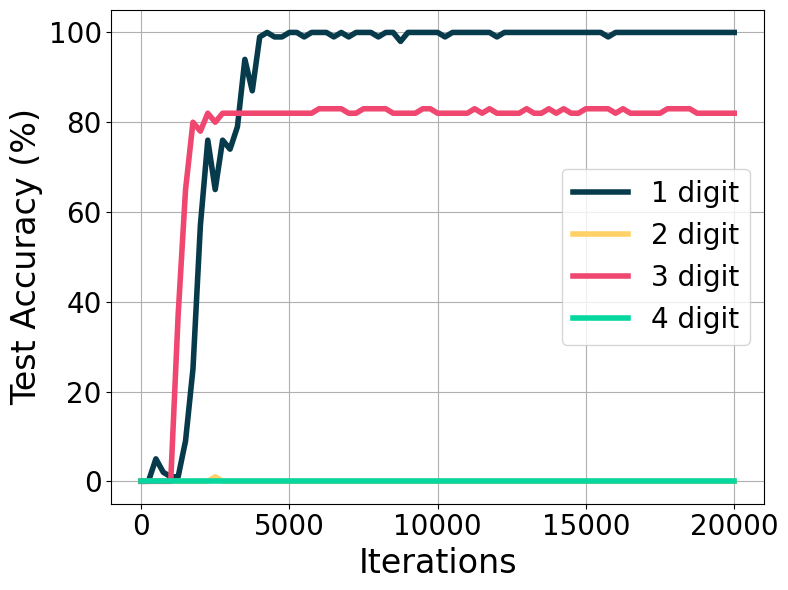

In [55]:
model='nanogpt'
name='1and3digits'

labels = ['1 digit', '2 digit', '3 digit', '4 digit']
names = ['ver1_1and3digit_lr0.001 - digit1_accuracy', 'ver1_1and3digit_lr0.001 - digit2_accuracy', 'ver1_1and3digit_lr0.001 - digit3_accuracy', 'ver1_1and3digit_lr0.001 - digit4_accuracy']

print(labels)

plt.figure(figsize=(8,6))
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

file = 'result_train1and3digits.csv'


for i, name in enumerate(names):
    df = pd.read_csv(f'{file}')
    plt.plot(df.iter, df[f'{name}'], label=labels[i], color=colors[i],linewidth=4)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
# plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(10000, 600000)
plt.xticks([0,5000,10000,15000,20000],
           [0,5000,10000,15000,20000], fontsize=20)
# plt.ylim(0, 100)
plt.xlabel('Iterations',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(fontsize=20)
plt.grid(True)
plt.tight_layout()

name='1and3digits'

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['1 digit', '2 digit', '3 digit', '4 digit', '5 digit', '6 digit', '7 digit', '8 digit']


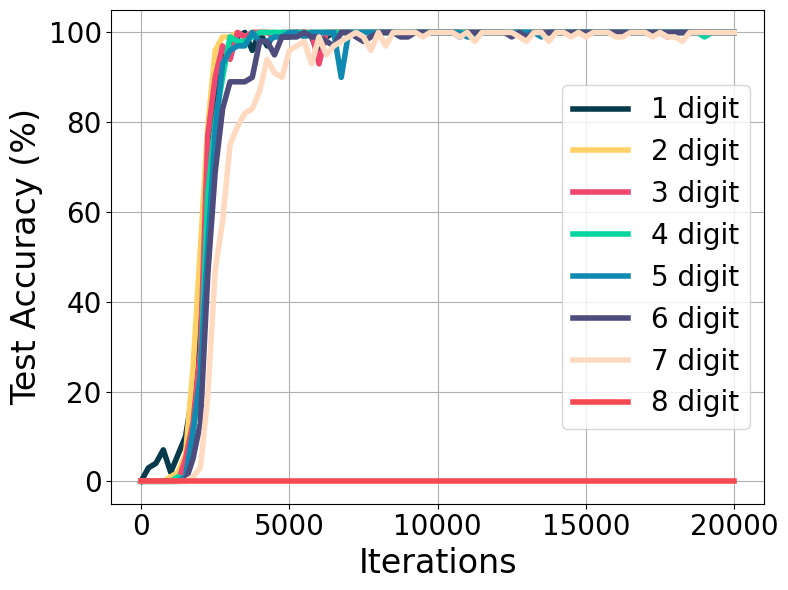

In [56]:
model='nanogpt'
name='7digits'

labels = ['1 digit', '2 digit', '3 digit', '4 digit', '5 digit', '6 digit', '7 digit', '8 digit']
names = ['ver1, 100k - digit1_accuracy', 'ver1, 100k - digit2_accuracy', 'ver1, 100k - digit3_accuracy', 'ver1, 100k - digit4_accuracy', 'ver1, 100k - digit5_accuracy', 'ver1, 100k - digit6_accuracy', 'ver1, 100k - digit7_accuracy', 'ver1, 100k - digit8_accuracy']

print(labels)

plt.figure(figsize=(8,6))
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

file = 'result_7digit.csv'


for i, name in enumerate(names):
    df = pd.read_csv(f'{file}')
    plt.plot(df.iter, df[f'{name}'], label=labels[i], color=colors[i],linewidth=4)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
# plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(10000, 600000)
plt.xticks([0,5000,10000,15000,20000],
           [0,5000,10000,15000,20000], fontsize=20)
# plt.ylim(0, 100)
plt.xlabel('Iterations',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(fontsize=20)
plt.grid(True)
plt.tight_layout()

name='7digits'

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)